In [28]:
%matplotlib inline

import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [29]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print(X_train.shape)

(60000, 28, 28)


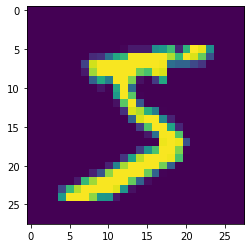

In [31]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [32]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [33]:

print( X_train.shape)

(60000, 1, 28, 28)


In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [35]:
print( y_train.shape)

(60000,)


In [36]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [37]:
print( Y_train.shape)

(60000, 10)


In [38]:
model = Sequential()

In [40]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

In [41]:
print( model.output_shape)

(None, 32, 26, 26)


In [42]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

In [43]:
print( model.output_shape)

(None, 5760)


In [44]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [45]:
print( model.output_shape)

(None, 10)


In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10


2022-06-25 10:19:09.673570: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-06-25 10:19:09.794345: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-06-25 10:19:10.562342: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-06-25 10:19:11.970952: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2604 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1098 - accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0700 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0619 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0490 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9864
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0380 - accurac

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
score

[0.032246511429548264, 0.9891999959945679]

In [55]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 619us/step
